<a href="https://colab.research.google.com/github/cglansford/CryptoAppFYP/blob/main/coin_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
from fbprophet import Prophet


In [12]:
def make_prediction(ticker, periods, hist='5y'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    > ticker
        - ticker of stock to forecast
    > periods
        - number of days into the future to forecast
    > hist
       - number of days into past to collect data from
    """
    # get data from yahoo finance
    coin_data = yf.Ticker(ticker)

    hist_data = coin_data.history(hist, auto_adjust=True)

    df = pd.DataFrame()

    #dates and closing values 
    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    model = Prophet(daily_seasonality=False)
    model.fit(df)

    future = model.make_future_dataframe(periods, freq='D')

    forecast = model.predict(future)

    model.plot(forecast)

    return forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,664.490899,504.625936,1293.546913,664.490899,664.490899,235.933856,235.933856,235.933856,-2.452099,-2.452099,-2.452099,238.385955,238.385955,238.385955,0.0,0.0,0.0,900.424755
1,2017-11-10,665.765793,477.781381,1250.273397,665.765793,665.765793,222.051804,222.051804,222.051804,-6.227217,-6.227217,-6.227217,228.279022,228.279022,228.279022,0.0,0.0,0.0,887.817597
2,2017-11-11,667.040687,473.308769,1261.608815,667.040687,667.040687,216.647203,216.647203,216.647203,-1.475609,-1.475609,-1.475609,218.122812,218.122812,218.122812,0.0,0.0,0.0,883.687890
3,2017-11-12,668.315581,477.145940,1296.853451,668.315581,668.315581,208.406806,208.406806,208.406806,0.349788,0.349788,0.349788,208.057018,208.057018,208.057018,0.0,0.0,0.0,876.722387
4,2017-11-13,669.590475,489.098931,1302.835602,669.590475,669.590475,198.496957,198.496957,198.496957,0.288127,0.288127,0.288127,198.208831,198.208831,198.208831,0.0,0.0,0.0,868.087432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2022-04-04,3658.316958,3079.187881,3911.596597,3658.316958,3658.316958,-153.348548,-153.348548,-153.348548,0.288127,0.288127,0.288127,-153.636674,-153.636674,-153.636674,0.0,0.0,0.0,3504.968411
1608,2022-04-05,3661.158047,3113.456077,3922.546325,3661.158047,3661.158047,-149.427514,-149.427514,-149.427514,2.497448,2.497448,2.497448,-151.924962,-151.924962,-151.924962,0.0,0.0,0.0,3511.730533
1609,2022-04-06,3663.999136,3116.157304,3917.855609,3663.999136,3663.999136,-143.265462,-143.265462,-143.265462,7.019562,7.019562,7.019562,-150.285023,-150.285023,-150.285023,0.0,0.0,0.0,3520.733675
1610,2022-04-07,3666.840226,3135.490021,3909.123083,3666.840226,3666.840226,-150.989695,-150.989695,-150.989695,-2.452099,-2.452099,-2.452099,-148.537596,-148.537596,-148.537596,0.0,0.0,0.0,3515.850531


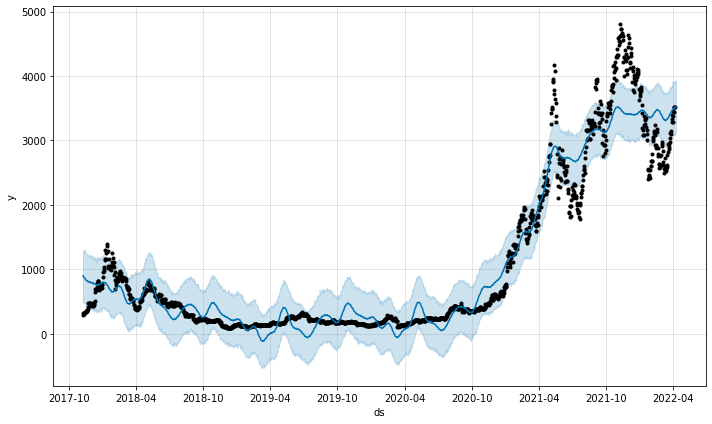

In [16]:
make_prediction('ETH-USD', 1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-05,1435.444450,-3148.876276,8074.738119,1435.444450,1435.444450,1118.125935,1118.125935,1118.125935,37.580013,37.580013,37.580013,1080.545922,1080.545922,1080.545922,0.0,0.0,0.0,2553.570385
1,2017-04-06,1464.845359,-3294.218680,8087.021689,1464.845359,1464.845359,972.798016,972.798016,972.798016,-45.171091,-45.171091,-45.171091,1017.969106,1017.969106,1017.969106,0.0,0.0,0.0,2437.643375
2,2017-04-07,1494.246268,-3500.958822,7967.923692,1494.246268,1494.246268,937.125616,937.125616,937.125616,-13.730315,-13.730315,-13.730315,950.855932,950.855932,950.855932,0.0,0.0,0.0,2431.371885
3,2017-04-08,1523.647178,-3078.318290,8026.298153,1523.647178,1523.647178,892.137748,892.137748,892.137748,10.896474,10.896474,10.896474,881.241274,881.241274,881.241274,0.0,0.0,0.0,2415.784926
4,2017-04-09,1553.048087,-3338.026741,7740.478487,1553.048087,1553.048087,800.623067,800.623067,800.623067,-10.571812,-10.571812,-10.571812,811.194879,811.194879,811.194879,0.0,0.0,0.0,2353.671154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2022-04-02,43351.031612,39315.403338,50091.559769,43351.031612,43351.031612,1241.137722,1241.137722,1241.137722,10.896474,10.896474,10.896474,1230.241248,1230.241248,1230.241248,0.0,0.0,0.0,44592.169334
1824,2022-04-03,43331.405366,38916.617467,49936.647847,43331.405366,43331.405366,1184.378470,1184.378470,1184.378470,-10.571812,-10.571812,-10.571812,1194.950282,1194.950282,1194.950282,0.0,0.0,0.0,44515.783836
1825,2022-04-04,43311.779120,38858.335294,49824.055169,43311.779120,43311.779120,1172.875894,1172.875894,1172.875894,23.432040,23.432040,23.432040,1149.443854,1149.443854,1149.443854,0.0,0.0,0.0,44484.655015
1826,2022-04-05,43292.152875,38655.416293,49864.279110,43292.152875,43292.152875,1092.815641,1092.815641,1092.815641,-2.435310,-2.435310,-2.435310,1095.250951,1095.250951,1095.250951,0.0,0.0,0.0,44384.968516


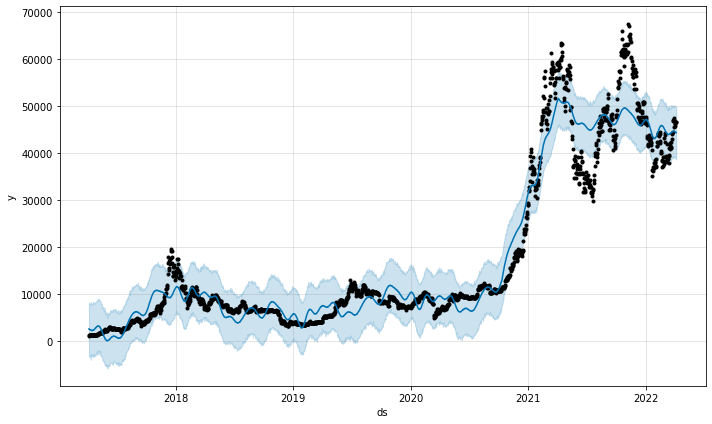

In [15]:
make_prediction('BTC-USD', 1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,0.914867,0.578008,1.180905,0.914867,0.914867,-0.024160,-0.024160,-0.024160,-0.002080,-0.002080,-0.002080,-0.022080,-0.022080,-0.022080,0.0,0.0,0.0,0.890707
1,2017-11-10,0.916537,0.594418,1.199773,0.916537,0.916537,-0.028140,-0.028140,-0.028140,-0.000285,-0.000285,-0.000285,-0.027855,-0.027855,-0.027855,0.0,0.0,0.0,0.888397
2,2017-11-11,0.918207,0.604523,1.177004,0.918207,0.918207,-0.029357,-0.029357,-0.029357,0.003975,0.003975,0.003975,-0.033332,-0.033332,-0.033332,0.0,0.0,0.0,0.888850
3,2017-11-12,0.919877,0.567364,1.176778,0.919877,0.919877,-0.036187,-0.036187,-0.036187,0.002326,0.002326,0.002326,-0.038513,-0.038513,-0.038513,0.0,0.0,0.0,0.883690
4,2017-11-13,0.921547,0.574436,1.154588,0.921547,0.921547,-0.043082,-0.043082,-0.043082,0.000332,0.000332,0.000332,-0.043414,-0.043414,-0.043414,0.0,0.0,0.0,0.878465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2022-04-02,0.893512,0.541866,1.128761,0.893512,0.893512,-0.065488,-0.065488,-0.065488,0.003975,0.003975,0.003975,-0.069462,-0.069462,-0.069462,0.0,0.0,0.0,0.828024
1606,2022-04-03,0.893363,0.527601,1.109347,0.893363,0.893363,-0.059068,-0.059068,-0.059068,0.002326,0.002326,0.002326,-0.061393,-0.061393,-0.061393,0.0,0.0,0.0,0.834295
1607,2022-04-04,0.893214,0.553716,1.125419,0.893214,0.893214,-0.052363,-0.052363,-0.052363,0.000332,0.000332,0.000332,-0.052696,-0.052696,-0.052696,0.0,0.0,0.0,0.840851
1608,2022-04-05,0.893066,0.568879,1.158384,0.893066,0.893066,-0.046089,-0.046089,-0.046089,-0.002730,-0.002730,-0.002730,-0.043359,-0.043359,-0.043359,0.0,0.0,0.0,0.846977


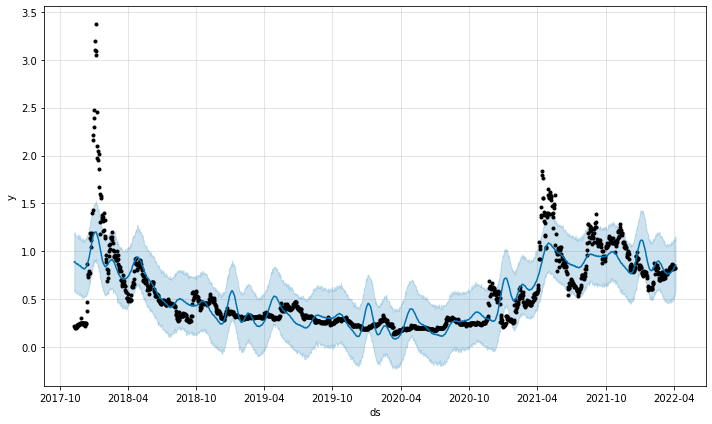

In [17]:
make_prediction('XRP-USD', 1)

           trend  yhat_lower  yhat_upper
1609  471.566489  426.763193   547.91815


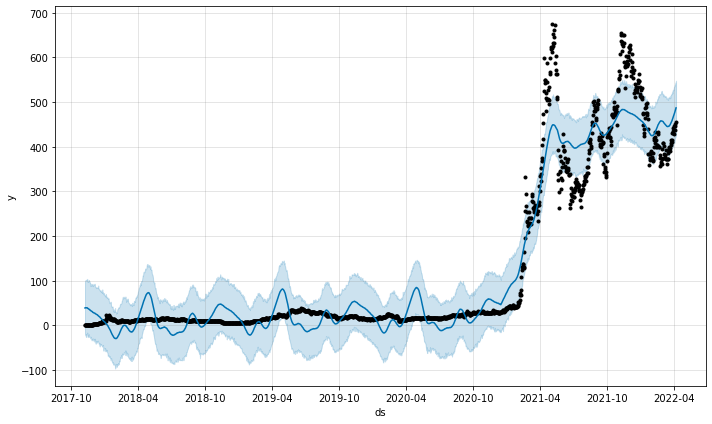

In [22]:
forcast = make_prediction('BNB-USD', 1)
forcast_forcast = forcast[['trend', 'yhat_lower', 'yhat_upper']].tail(1)
print(forcast_forcast)